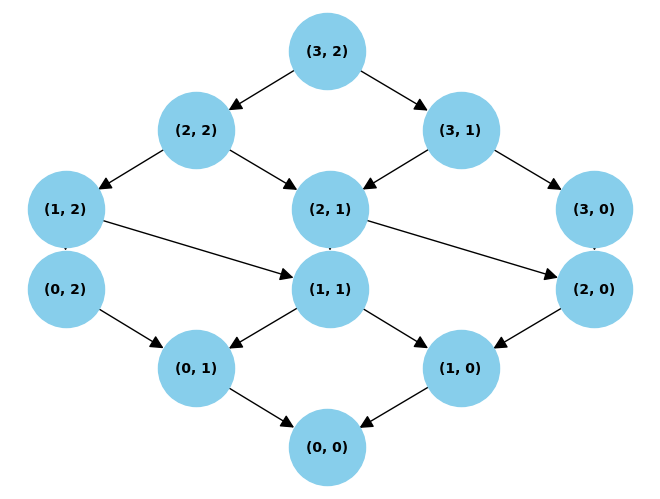

In [12]:
# 3개 있던 더미에서 빠져나가면 왼쪽 아래로
# 2개 있던 더미에서 빠져나가면 오른쪽 아래로 내려가는 이진코드를 계획

import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout

class Node:
    def __init__(self, tokens1, tokens2): # 토큰 수 저장
        self.tokens1 = tokens1
        self.tokens2 = tokens2
        self.left = None
        self.right = None

def create_tree(node): # 자식노드 생성
    if node.tokens1 > 0:
        node.left = Node(node.tokens1 - 1, node.tokens2)
        create_tree(node.left) # 재귀 돌림
    if node.tokens2 > 0:
        node.right = Node(node.tokens1, node.tokens2 - 1)
        create_tree(node.right)

def add_edges(graph, node): # 노드, 간선
    if node.left is not None:
        graph.add_edge((node.tokens1, node.tokens2), (node.left.tokens1, node.left.tokens2))
        add_edges(graph, node.left)
    if node.right is not None:
        graph.add_edge((node.tokens1, node.tokens2), (node.right.tokens1, node.right.tokens2))
        add_edges(graph, node.right)

def draw_tree(node):
    graph = nx.DiGraph()
    add_edges(graph, node)
    pos = graphviz_layout(graph, prog="dot")
    labels = {(n1, n2): f'({n1}, {n2})' for n1, n2 in graph.nodes()}
    nx.draw(graph, pos, labels=labels, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_color='black', font_weight='bold', arrowsize=20)
    plt.show()


root = Node(3, 2) # 초기
create_tree(root) # 트리 생성
draw_tree(root)

# 트리 그림 그려달라고 요청
# 형태 개선하는 것은 추가적인 도구가 필요